# Weather Time Series Analysis and Forecast
### Reykjavik, iceland
Esmaail Albarazi 2017281413
#
An Nguyen 2024157952


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Set the style of seaborn for better looking plots
sns.set()

In [81]:
num_years  = 10

import data

In [82]:
ts = pd.read_csv('Reykjavik.csv')
ts

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),...,sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm)
0,1/1/40,73,2.2,-1.7,0.3,-3.2,-6.8,-4.8,1940-01-01T11:18,1940-01-01T15:42,...,NaN,NaN,NaN,NaN,11,22.3,NaN,73,NaN,NaN
1,1/2/40,73,1.0,-0.4,0.3,-4.0,-5.9,-4.9,1940-01-02T11:17,1940-01-02T15:44,...,0.00,3.7,0.1,2.52,23,19.8,39.6,77,0.09,0.44
2,1/3/40,73,4.0,-0.4,1.9,1.2,-6.3,-3.1,1940-01-03T11:16,1940-01-03T15:46,...,0.00,5.0,1.2,2.66,16,30.0,54.0,102,0.10,0.27
3,1/4/40,53,5.4,1.5,2.5,1.5,-2.1,-1.3,1940-01-04T11:15,1940-01-04T15:48,...,828.68,2.1,2.1,0.00,12,21.1,27.7,150,0.20,0.02
4,1/5/40,55,6.5,4.6,5.6,1.8,0.2,1.2,1940-01-05T11:13,1940-01-05T15:50,...,0.00,5.5,5.5,0.00,11,29.9,52.9,148,0.16,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30950,9/26/24,3,5.1,-1.1,2.4,2.2,-4.2,-0.5,2024-09-26T07:23,2024-09-26T19:12,...,13904.13,0.0,0.0,0.00,0,9.4,20.2,318,5.18,0.60
30951,9/27/24,51,7.2,3.6,5.2,5.1,1.2,3.1,2024-09-27T07:26,2024-09-27T19:09,...,4209.56,1.1,1.1,0.00,11,11.8,21.2,92,4.15,0.56
30952,9/28/24,53,5.9,3.8,5.0,2.7,-0.1,1.4,2024-09-28T07:29,2024-09-28T19:05,...,0.00,4.2,4.2,0.00,16,16.8,31.7,103,1.70,0.45
30953,9/29/24,53,8.0,2.1,5.3,6.1,-1.6,2.1,2024-09-29T07:32,2024-09-29T19:02,...,7455.96,4.4,4.4,0.00,13,17.3,32.4,66,3.90,0.52


In [83]:
temp_mean = ts['temperature_2m_mean (°C)']
t = ts['time']
print(len(temp_mean))
print(len)

for some reason pd.to_datetime function was mixing between 1900s and 2000s, so it was doing 2040 instead of 1940 

so i had to do this thingy that adds 1900 to the year number in the date string if from before 2000 and 2000 if after

In [84]:
t_90s= [t[i][:-2]+str(1900+ int(t[i][-2:])) for i in range(365*60+14)]
t_20s= [t[i][:-2]+str(2000+ int(t[i][-2:])) for i in range(365*60+15,len(t))]
t = t_90s + t_20s

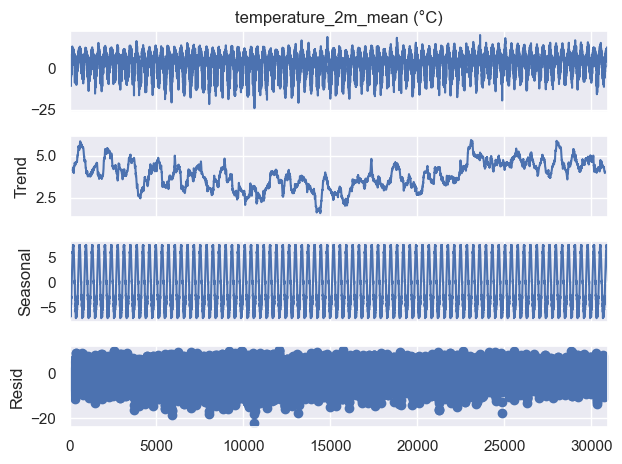

In [ ]:
# Using statsmodels to decompose the time series
result = seasonal_decompose(temp_mean, model='additive', period=365)
result.plot()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (30954,) and (30955,)

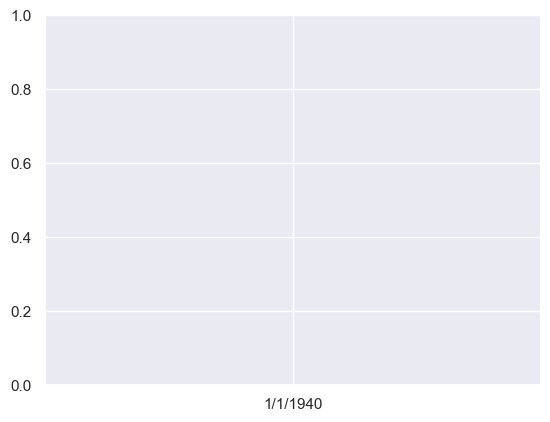

In [93]:
# add trend and seasonality to the residuals
residual = result.resid
trend = result.trend
seasonal = result.seasonal

# plot the sum of trend and seasonality
plt.plot(t, trend + seasonal)
plt.show()

ADF Statistic: -3.965926
p-value: 0.001600
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
30954
3650


/tmp/ipykernel_218888/758357084.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_mean = temp_mean.rolling(window=30).mean().fillna(method='bfill')
/tmp/ipykernel_218888/758357084.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rolling_std = temp_mean.rolling(window=30).std().fillna(method='bfill')


ValueError: x and y must have same first dimension, but have shapes (30954,) and (3650,)

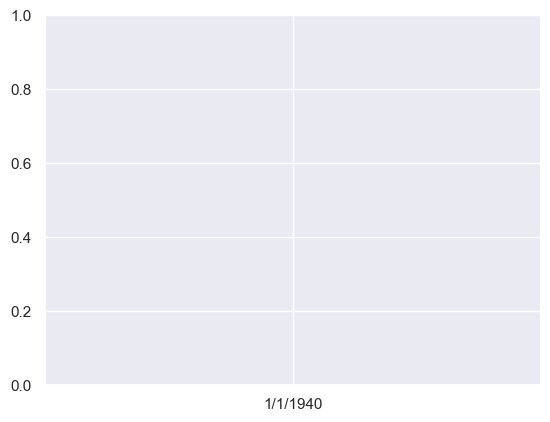

In [100]:
# adfuller test
result = adfuller(temp_mean)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Rolling mean and standard deviation with window size of 30 days
rolling_mean = temp_mean.rolling(window=30).mean().fillna(method='bfill')
rolling_std = temp_mean.rolling(window=30).std().fillna(method='bfill')

# Plot the original data with rolling mean and standard deviation
plt.plot(t, temp_mean, label='Original')
plt.plot(t, rolling_mean, label='Rolling Mean')
plt.plot(t, rolling_std, label='Rolling Std')
plt.legend()
plt.show()

In [43]:
t = pd.to_datetime(t, format='mixed')

In [44]:
t[-1],t[0]

(Timestamp('2024-09-30 00:00:00'), Timestamp('1940-01-01 00:00:00'))

# Fit a polynomial line to time series

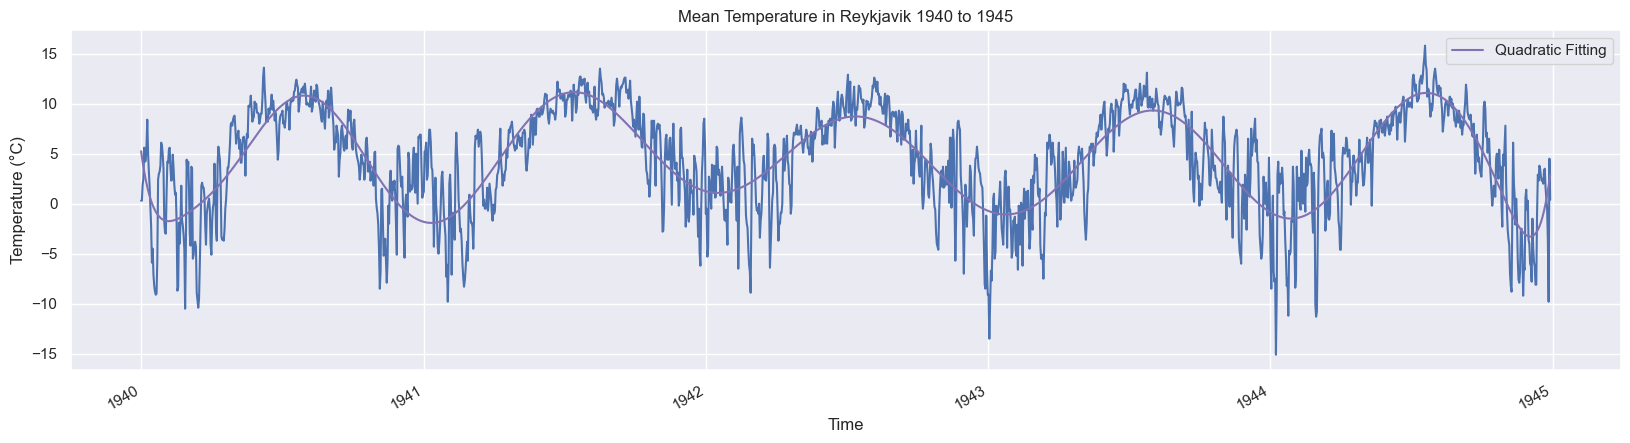

In [51]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

# Plot mean temperature in Reykjavik
ax.plot(t[:365*num_years], temp_mean[:365*num_years])

coefs=np.polyfit(range(365*num_years),temp_mean[:365*num_years],16)
quadTS = pd.Series(np.polyval(coefs,range(365*num_years)),index=t[:365*num_years], name='Quadratic Fitting')

quadTS.plot(ax=ax,legend=True,color='m')
# Set the title and labels
ax.set_title('Mean Temperature in Reykjavik 1940 to '+str(1940 + num_years))
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')

# Show the plot
plt.show()

# Remove Seasonality Lines

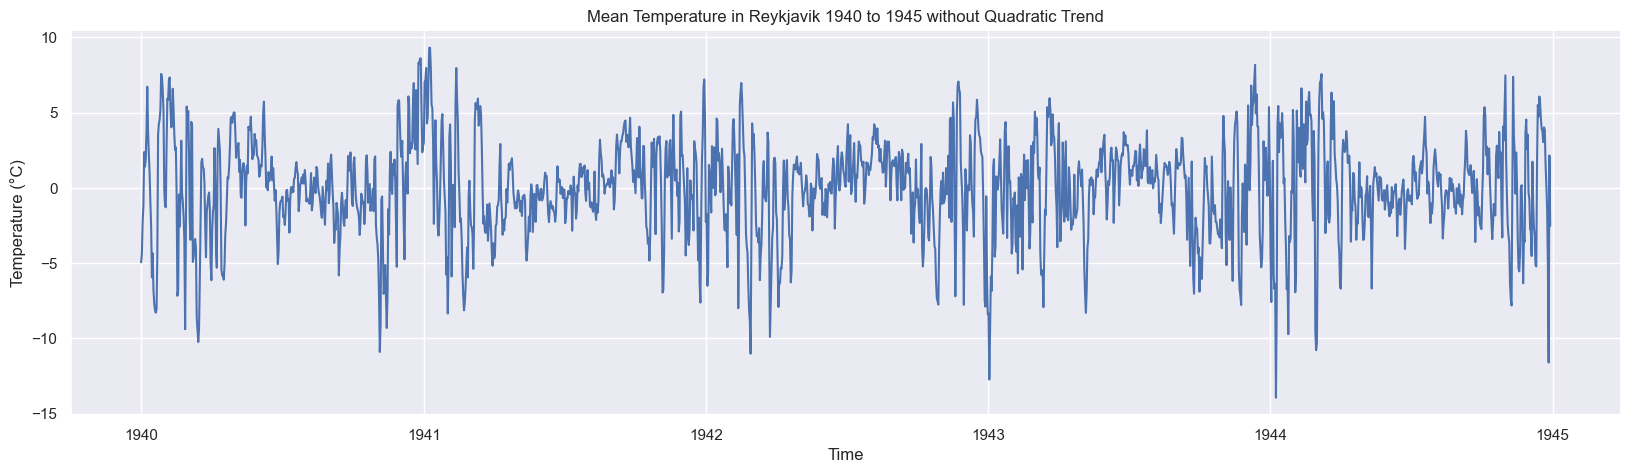

In [50]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

coefs=np.polyfit(range(365*num_years),temp_mean[:365*num_years],16)
quadTS = pd.Series(np.polyval(coefs,range(365*num_years)),index=t[:365*num_years], name='Quadratic Fitting')

# Plot mean temperature minus quadratic trend in Reykjavik
ax.plot(t[:365*num_years], temp_mean[:365*num_years] - quadTS.values)

# Set the title and labels
ax.set_title('Mean Temperature in Reykjavik 1940 to '+str(1940 + num_years) + ' without Quadratic Trend')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')

# Show the plot
plt.show()

/var/folders/kb/_cpr8y_x64ngw7_s451m1qjw0000gn/T/ipykernel_23208/2201025842.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xf[k]=res_wls.params[1]*k+res_wls.params[0]


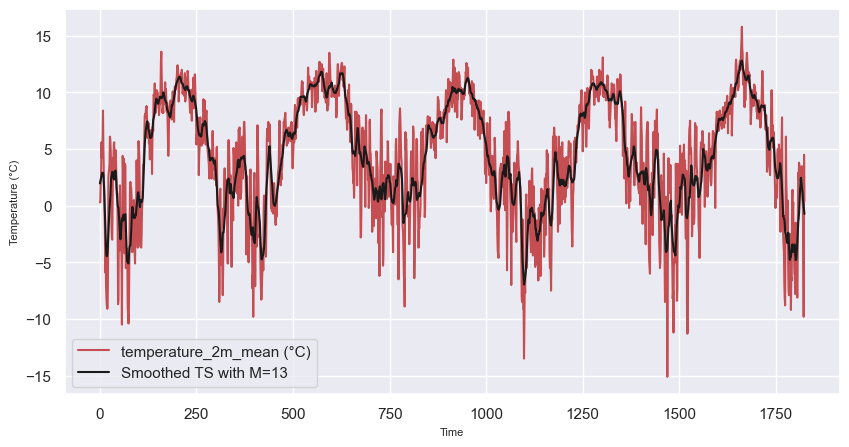

In [10]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def flin(x,a,b):
    return a*x+b

def xWeights(x,xi,span):
    wi=(1-abs((x-xi)/float(span))**3)**3
    #plt.figure()
    #plt.plot(wi)
    return wi

def yWeights(ri,MAD):
    if np.abs(ri)<6*MAD:
        return (1-((ri/(6*MAD))**2))**2
    else:
        return 0


def loessPass(TSeries,TSeriesE=pd.Series(np.array([])),span=5,timePass=True):
    lag=int((span-1)/2)
    xf=np.zeros(TSeries.size).astype('float')
    for k in range(TSeries.size):
        if k<=lag:
            win=TSeries[0:span]
            if not timePass:
                winE=TSeriesE[0:span]
            xvs=np.array(range(span))
            #print "No inicio"
        elif k>TSeries.size-lag:
            #print "No fim"
            win=TSeries[TSeries.size-span:TSeries.size]
            if not timePass:
                winE=TSeriesE[TSeriesE.size-span:TSeriesE.size]
            xvs=np.array(range(TSeries.size-span,TSeries.size))
        else:
            #print "No meio"
            win=TSeries[k-lag-1:k+lag]
            if not timePass:
                winE=TSeriesE[k-lag-1:k+lag]
            xvs=np.array(range(k-lag,k+lag+1))

        ws=np.zeros(span).astype('float')
            
        if not timePass:
            res=np.array(win-winE)
            #res=res.as_matrix()
            MAD=np.median(np.abs(res))
            
        for xw in range(len(xvs)):
            if timePass:
                ws[xw]=xWeights(k,xvs[xw],np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1]))))
            else:
                ws[xw]=yWeights(res[xw],MAD)
            #print np.max((np.abs(k-xvs[0]),np.abs(k-xvs[-1])))
        exog = sm.add_constant(xvs)
        
        
        mod_wls = sm.WLS(win, exog, weights=ws)
        res_wls = mod_wls.fit()
        
        xf[k]=res_wls.params[1]*k+res_wls.params[0]
    return xf

def lowess(TSeries,span=5,ftype='linear'):
    
    xf=loessPass(TSeries,span=span,timePass=True)
    xf=loessPass(TSeries,TSeriesE=pd.Series(data=xf, index=TSeries.index),span=span,timePass=False)
    xf=pd.Series(data=xf, index=TSeries.index,name="Smoothed TS with M="+str(M))
    return xf


# apply smooth 13 
M=365
smooth13 = lowess(temp_mean[:365*num_years],span=M)

# Create a new figure with a specific size (width, height)
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the width as needed

temp_mean[:365*num_years].plot(ax=ax, color='r', legend=True)
smooth13.plot(ax=ax, color='k', legend=True)
ax.set_ylabel('Temperature (°C)', fontdict={'fontsize':8})
ax.set_xlabel('Time', fontdict={'fontsize':8})
plt.show()

we can transform the time serie to frequency insread of time (years -> cucles per year) so it's better visualized the trend per year


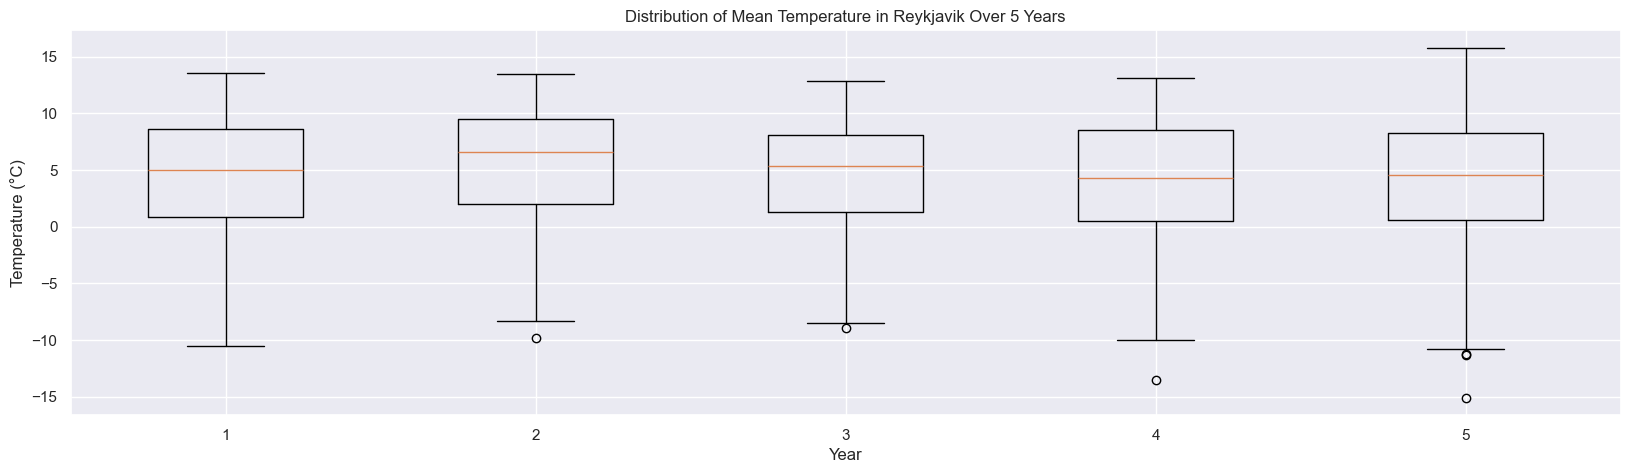

In [11]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

# Assuming `temp_mean` is split into daily temperatures for each year
ax.boxplot([temp_mean[365*i:365*(i+1)] for i in range(num_years)])
# Set the title and labels
ax.set_title('Distribution of Mean Temperature in Reykjavik Over '+str(num_years)+' Years')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (°C)')

# Show the plot
plt.show()


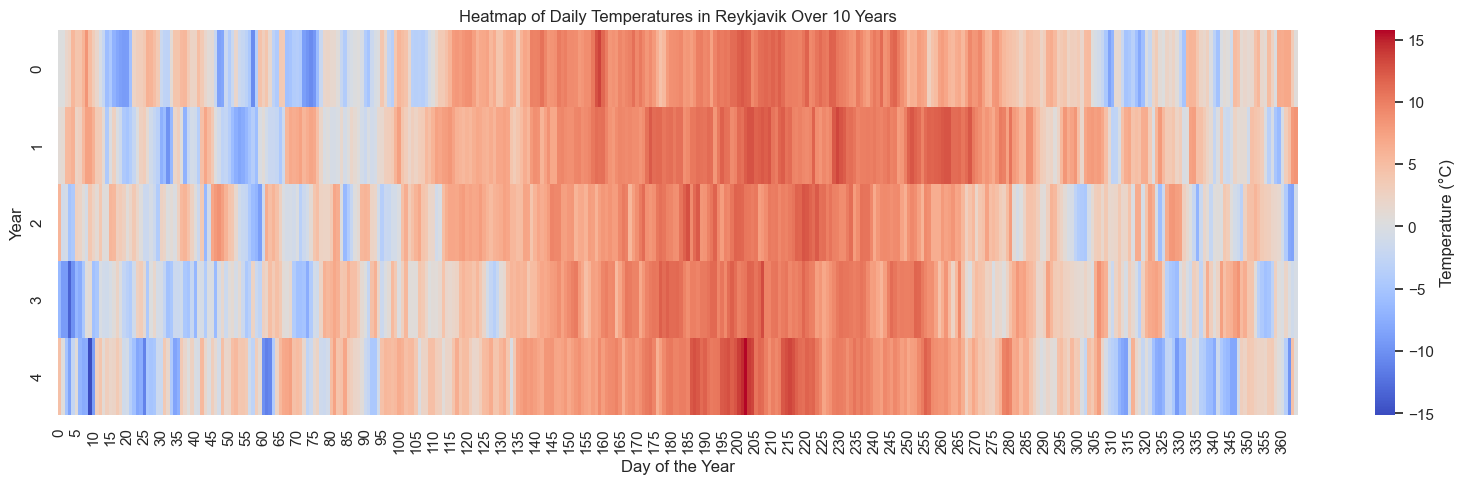

In [12]:

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

# Reshape the temperature data to 365 days for several years
data = np.reshape(temp_mean[:365*num_years], (num_years, 365))

# Plot heatmap using seaborn
sns.heatmap(data, ax=ax, cmap="coolwarm", cbar_kws={'label': 'Temperature (°C)'})

# Set the title and labels
ax.set_title('Heatmap of Daily Temperatures in Reykjavik Over 10 Years')
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Year')

# Show the plot
plt.show()


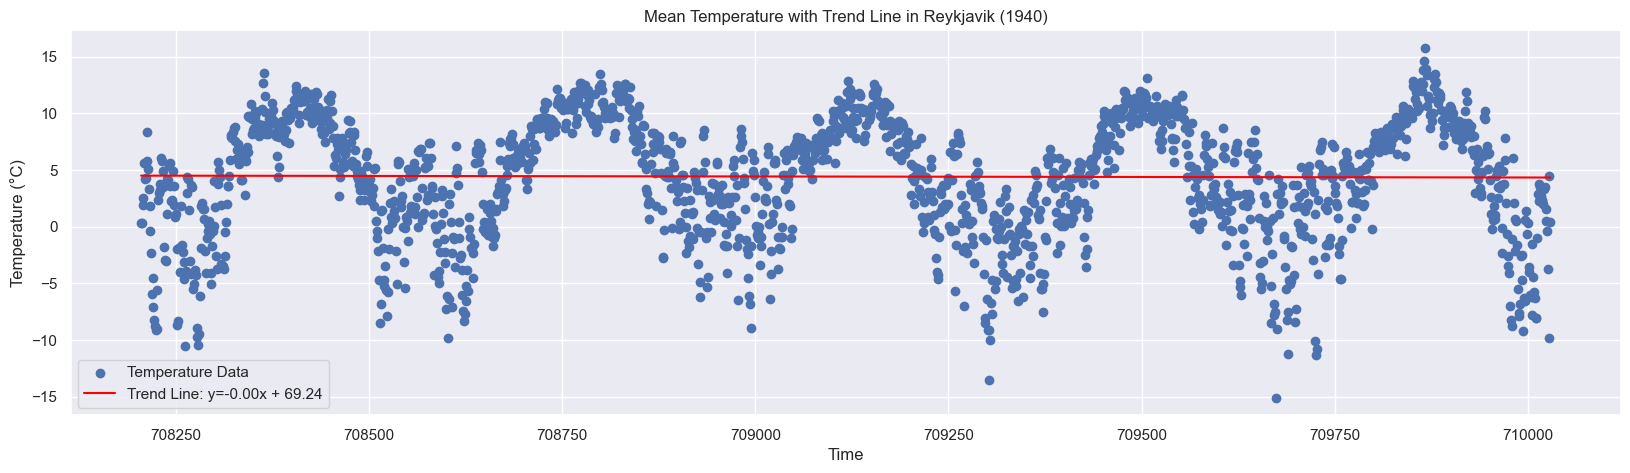

In [13]:
from scipy import stats

t_numeric = t.map(lambda date: date.toordinal())

# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20, 5))

# Scatter plot of temperatures over time
ax.scatter(t_numeric[:365*num_years], temp_mean[:365*num_years], label='Temperature Data')

# Fit a trend line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(t_numeric[:365*num_years], temp_mean[:365*num_years])
ax.plot(t_numeric[:365*num_years], intercept + slope * np.array(t_numeric[:365*num_years]), color='red', label=f'Trend Line: y={slope:.2f}x + {intercept:.2f}')

# Set the title and labels
ax.set_title('Mean Temperature with Trend Line in Reykjavik (1940)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.legend()

# Show the plot
plt.show()
